In [1]:
import matplotlib.pyplot as plt
import numpy as np
from graphtime import GroupFusedGraphLasso, IndepFusedGraphLasso
from graphtime.utils import get_edges, get_change_points, plot_data_with_cps
from graphtime.vis import plot_graph

/home/agibberd/.local/bin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


ModuleNotFoundError: No module named 'graphtime'

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Parameters and Example Data

In [ ]:
y = np.load('data/y.npy')
sigma = np.load('data/sigma.npy')
sigma_inv = np.load('data/sigma_inv.npy')
T = 90 # Steps
K = 2 # Changepoints
P = 10 # Variables
M = 5 # Active Edges
eps = 0.000001 # Edge threshold epsilon

## True Changepoints

In [2]:
edges = get_edges(sigma_inv[0], eps, P)
change_point_hist = get_change_points(sigma_inv, eps, T, P)
change_points = [i for i, cp in enumerate(change_point_hist) if cp > 0]
plot_data_with_cps(y, change_points, ymin=-5, ymax=5)

NameError: name 'get_edges' is not defined

In [6]:
verbose = False
tol = 1e-4
max_iter = 500
gammas = [1, 1, 1] # gamma_V1, gamma_V2, gamma_W
lambda1G = 0.15
lambda2G = 25
lambda1I = 0.25
lambda2I = 2

## Estimated Changepoints with GFGL smoother

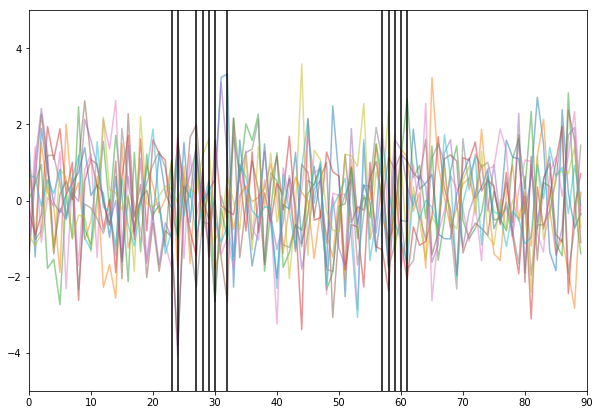

In [7]:
gfgl = GroupFusedGraphLasso(lambda1G, lambda2G, gammas[0], gammas[1], gammas[2], tol, max_iter, verbose)
gfgl.fit(y)
change_point_hist = get_change_points(gfgl.sparse_Theta, 0.01, T, P)
change_points = [i for i, cp in enumerate(change_point_hist) if cp > 0]
plot_data_with_cps(y, change_points, ymin=-5, ymax=5)

## Estimated Changepoitns with IFGL smoother

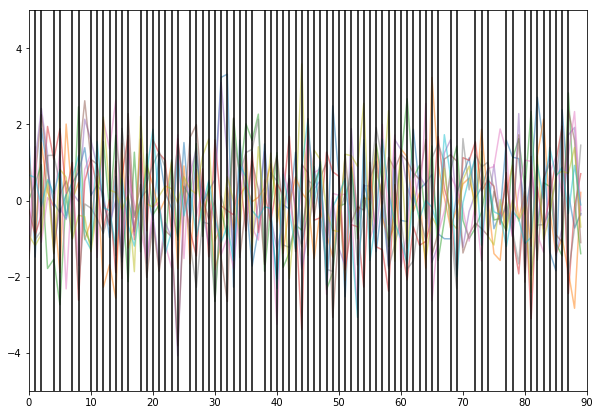

In [14]:
ifgl = IndepFusedGraphLasso(lambda1I, lambda2I, gammas[0], gammas[1], gammas[2], tol, max_iter, verbose)
ifgl.fit(y)
change_point_hist = get_change_points(ifgl.sparse_Theta, 0.01, T, P)
change_points = [i for i, cp in enumerate(change_point_hist) if cp > 0]
plot_data_with_cps(y, change_points, ymin=-5, ymax=5)

(90, 10)